# ***Ujian Akhir Semester***

hubungkan terlebih dahulu data yang ingin kita analisa dengan code yang nantinya kita akan proses

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

bisa terlihat bahwa data yang saya pilih berjumlah 33 featur selanjutnya kita akan masuk ke dalam data understanding

## **Data Understanding**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

### *Deskripsi Kolom Data*

In [3]:
df = pd.concat([X,y], axis=1)



# 1. Tampilkan informasi dasar
print("=== Info Dataset ===")
print(df.info())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    o

In [4]:
# 2. Statistik deskriptif kolom numerik
print("\n=== Statistik Deskriptif ===")
print(df.describe())


=== Statistik Deskriptif ===
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210 

In [5]:
print("\n=== 5 Data Teratas ===")
print(df.head())


=== 5 Data Teratas ===
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [6]:
# 3. Jumlah data unik tiap kolom (untuk cek kategorikal vs numerik)
print("\n=== Nilai Unik Tiap Kolom ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



=== Nilai Unik Tiap Kolom ===
school: 2
sex: 2
age: 8
address: 2
famsize: 2
Pstatus: 2
Medu: 5
Fedu: 5
Mjob: 5
Fjob: 5
reason: 4
guardian: 3
traveltime: 4
studytime: 4
failures: 4
schoolsup: 2
famsup: 2
paid: 2
activities: 2
nursery: 2
higher: 2
internet: 2
romantic: 2
famrel: 5
freetime: 5
goout: 5
Dalc: 5
Walc: 5
health: 5
absences: 24
G1: 17
G2: 16
G3: 17


Berikut ini adalah data penjelasan kolom yang saya miliki pada data:

| Kolom        | Tipe   | Deskripsi                                                                                 |
| ------------ | ------ | ----------------------------------------------------------------------------------------- |
| `school`     | object | Sekolah tempat siswa belajar: `'GP'` (Gabriel Pereira) atau `'MS'` (Mousinho da Silveira) |
| `sex`        | object | Jenis kelamin siswa: `'F'` = perempuan, `'M'` = laki-laki                                 |
| `age`        | int    | Usia siswa (15–22 tahun)                                                                  |
| `address`    | object | Tempat tinggal: `'U'` = urban, `'R'` = rural                                              |
| `famsize`    | object | Ukuran keluarga: `'LE3'` = ≤3 orang, `'GT3'` = >3 orang                                   |
| `Pstatus`    | object | Status hidup bersama orang tua: `'T'` = tinggal bersama, `'A'` = terpisah                 |
| `Medu`       | int    | Tingkat pendidikan ibu (0: tidak sekolah – 4: pendidikan tinggi)                          |
| `Fedu`       | int    | Tingkat pendidikan ayah (0–4 seperti di atas)                                             |
| `Mjob`       | object | Pekerjaan ibu: `'teacher'`, `'health'`, `'services'`, `'at_home'`, `'other'`              |
| `Fjob`       | object | Pekerjaan ayah: (sama seperti `Mjob`)                                                     |
| `reason`     | object | Alasan memilih sekolah: `'home'`, `'reputation'`, `'course'`, `'other'`                   |
| `guardian`   | object | Wali utama siswa: `'mother'`, `'father'`, `'other'`                                       |
| `traveltime` | int    | Waktu perjalanan ke sekolah (1: <15min, 2: 15–30min, 3: 30min–1h, 4: >1h)                 |
| `studytime`  | int    | Waktu belajar mingguan (1: <2h, 2: 2–5h, 3: 5–10h, 4: >10h)                               |
| `failures`   | int    | Jumlah kegagalan kelas sebelumnya (0–3, lebih dari 3 juga dikodekan sebagai 3)            |
| `schoolsup`  | object | Dukungan tambahan dari sekolah (support class): `'yes'` atau `'no'`                       |
| `famsup`     | object | Dukungan belajar dari keluarga: `'yes'` atau `'no'`                                       |
| `paid`       | object | Ikut les privat pelajaran matematika: `'yes'` atau `'no'`                                 |
| `activities` | object | Ikut kegiatan ekstrakurikuler: `'yes'` atau `'no'`                                        |
| `nursery`    | object | Pernah ikut pendidikan pra-sekolah: `'yes'` atau `'no'`                                   |
| `higher`     | object | Ingin melanjutkan ke pendidikan tinggi: `'yes'` atau `'no'`                               |
| `internet`   | object | Akses internet di rumah: `'yes'` atau `'no'`                                              |
| `romantic`   | object | Sedang menjalin hubungan romantis: `'yes'` atau `'no'`                                    |
| `famrel`     | int    | Kualitas hubungan dalam keluarga (1 – sangat buruk hingga 5 – sangat baik)                |
| `freetime`   | int    | Waktu luang setelah sekolah (1 – sangat sedikit hingga 5 – sangat banyak)                 |
| `goout`      | int    | Frekuensi pergi keluar dengan teman (1 – sangat jarang hingga 5 – sangat sering)          |
| `Dalc`       | int    | Konsumsi alkohol di hari kerja (1 – sangat rendah hingga 5 – sangat tinggi)               |
| `Walc`       | int    | Konsumsi alkohol di akhir pekan (weekend)                                                 |
| `health`     | int    | Status kesehatan saat ini (1 – sangat buruk hingga 5 – sangat baik)                       |
| `absences`   | int    | Jumlah ketidakhadiran                                                                     |
| `G1`         | int    | Nilai ujian pertama (0–20)                                                                |
| `G2`         | int    | Nilai ujian kedua (0–20)                                                                  |
| `G3`         | int    | **Nilai akhir** (target prediksi)                                                         |


### *Missing Value*

In [7]:
# Menampilkan jumlah missing value per kolom
print("Jumlah Missing Value per Kolom:")
print(df.isnull().sum())

Jumlah Missing Value per Kolom:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:

# Menampilkan persentase missing value per kolom (opsional)
print("\nPersentase Missing Value per Kolom:")
print((df.isnull().mean() * 100).round(2))


Persentase Missing Value per Kolom:
school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


### *Outlies Detection*

In [9]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include='number')

print("=== DETEKSI OUTLIER MENGGUNAKAN Z-SCORE ===")
# Hitung Z-score untuk semua kolom numerik
z_scores = numeric_df.apply(zscore)

# Tandai outlier: nilai Z-score > 3 atau < -3
outliers_z = (z_scores.abs() > 3)

# Tampilkan jumlah outlier per kolom
outlier_count_z = outliers_z.sum()
print(outlier_count_z)

print("\n=== DETEKSI OUTLIER MENGGUNAKAN IQR ===")
outlier_count_iqr = {}

# Hitung outlier per kolom berdasarkan IQR
for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)]
    outlier_count_iqr[col] = len(outliers)

# Tampilkan jumlah outlier per kolom
outlier_count_iqr = pd.Series(outlier_count_iqr)
print(outlier_count_iqr)


=== DETEKSI OUTLIER MENGGUNAKAN Z-SCORE ===
age            3
Medu           0
Fedu           0
traveltime    16
studytime      0
failures      14
famrel        22
freetime       0
goout          0
Dalc          17
Walc           0
health         0
absences      11
G1             1
G2             7
G3            16
dtype: int64

=== DETEKSI OUTLIER MENGGUNAKAN IQR ===
age             1
Medu            0
Fedu            0
traveltime     16
studytime      35
failures      100
famrel         51
freetime       45
goout           0
Dalc           34
Walc            0
health          0
absences       21
G1             16
G2             25
G3             16
dtype: int64


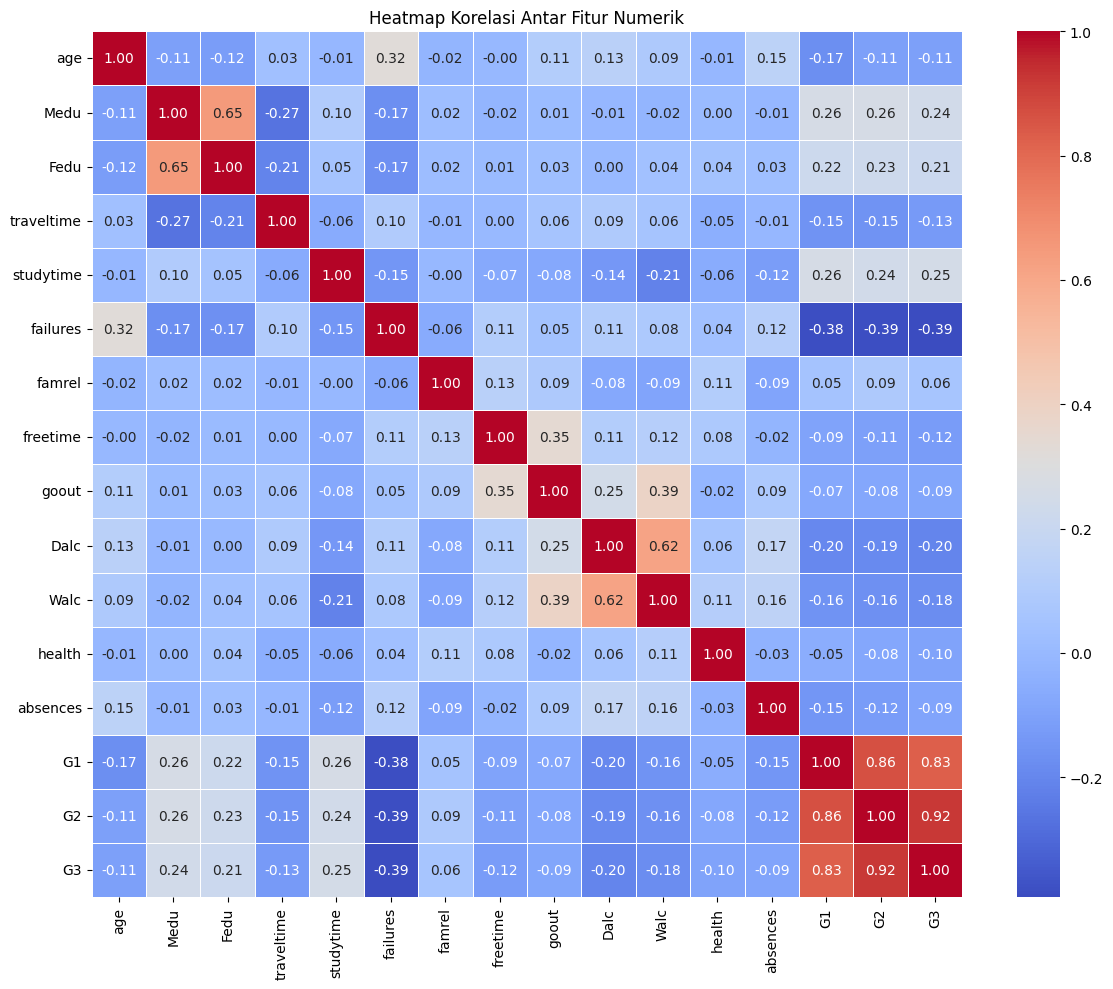

=== Korelasi terhadap G3 (nilai akhir) ===
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

=== Fitur dengan Korelasi Tinggi dengan G3 (|corr| > 0.5) ===
G2    0.918548
G1    0.826387
Name: G3, dtype: float64


In [10]:
# Ambil hanya fitur numerik
numeric_df = df.select_dtypes(include='number')

# Hitung korelasi antar fitur numerik
correlation_matrix = numeric_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()

# Tampilkan korelasi fitur terhadap target G3
print("=== Korelasi terhadap G3 (nilai akhir) ===")
target_corr = correlation_matrix["G3"].drop("G3").sort_values(ascending=False)
print(target_corr)

# Jika ingin melihat fitur dengan korelasi tinggi (misalnya > 0.5 atau < -0.5)
print("\n=== Fitur dengan Korelasi Tinggi dengan G3 (|corr| > 0.5) ===")
strong_corr = target_corr[abs(target_corr) > 0.5]
print(strong_corr)



1. 📊 **Fitur yang Sangat Berkorelasi dengan `G3` (Target)**

| Fitur | Korelasi dengan G3 | Penjelasan                                                                  |
| ----- | ------------------ | --------------------------------------------------------------------------- |
| `G2`  | **0.92**           | Korelasi sangat kuat. Nilai ujian ke-2 sangat menentukan hasil akhir (`G3`) |
| `G1`  | **0.83**           | Korelasi kuat juga. Nilai ujian pertama juga sangat memengaruhi hasil akhir |

✅ Kedua fitur ini **wajib dipertahankan dalam modeling**, karena sangat informatif untuk prediksi.

---

2. 📉 **Fitur Lain dengan Korelasi Lemah–Sedang (positif):**

* `studytime`: 0.25 → Lebih banyak waktu belajar cenderung menghasilkan nilai akhir lebih tinggi.
* `Medu` & `Fedu`: \~0.21–0.24 → Pendidikan orang tua memberi kontribusi kecil.
* `famrel`: 0.06 → Kualitas hubungan keluarga sedikit berpengaruh.

---

3. ❌ **Fitur dengan Korelasi Negatif terhadap G3:**

| Fitur          | Korelasi      | Interpretasi                                                |
| -------------- | ------------- | ----------------------------------------------------------- |
| `failures`     | **-0.39**     | Gagal di masa lalu menurunkan kemungkinan nilai akhir bagus |
| `Dalc`, `Walc` | -0.20 & -0.18 | Konsumsi alkohol cenderung menurunkan prestasi              |
| `absences`     | -0.09         | Siswa yang sering absen cenderung punya nilai lebih rendah  |



## **Data Preprocessing**

### *Missing Value(tidak digunakan)*

### *Memilih Kolom dengan Korelasi terhadap Data Akhir*

In [11]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include='number')

# Hitung korelasi dengan G3
correlation_with_target = numeric_df.corr()["G3"].drop("G3")

# Ambil fitur dengan korelasi kuat (positif atau negatif)
selected_features = correlation_with_target[abs(correlation_with_target) > 0.2].index.tolist()

# Tambahkan target G3
selected_features.append("G3")

# Buat dataset baru hanya dengan fitur terpilih
df_selected = df[selected_features]

# Tampilkan fitur yang dipilih
print("Fitur yang dipilih berdasarkan korelasi:")
print(selected_features)


Fitur yang dipilih berdasarkan korelasi:
['Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'G1', 'G2', 'G3']


In [12]:
print(df_selected)

     Medu  Fedu  studytime  failures  Dalc  G1  G2  G3
0       4     4          2         0     1   0  11  11
1       1     1          2         0     1   9  11  11
2       1     1          2         0     2  12  13  12
3       4     2          3         0     1  14  14  14
4       3     3          2         0     1  11  13  13
..    ...   ...        ...       ...   ...  ..  ..  ..
644     2     3          3         1     1  10  11  10
645     3     1          2         0     1  15  15  16
646     1     1          2         0     1  11  12   9
647     3     1          1         0     3  10  10  10
648     3     2          1         0     3  10  11  11

[649 rows x 8 columns]


### *Deteksi Outlier*


Apa Itu IQR (Interquartile Range)
IQR singkatan dari Interquartile Range, atau dalam Bahasa Indonesia sering disebut Jangkauan Antarkuartil. Dalam statistika deskriptif, IQR adalah ukuran penyebaran data yang memberikan informasi tentang rentang tengah 50% dari suatu distribusi data.

Bayangkan Anda memiliki kumpulan data yang sudah diurutkan dari yang terkecil hingga terbesar. IQR akan memberitahu Anda seberapa jauh jarak antara nilai yang memisahkan 25% data terbawah dengan nilai yang memisahkan 25% data teratas.

Konsep Dasar: Kuartil
Untuk memahami IQR, kita perlu memahami konsep kuartil. Kuartil membagi kumpulan data yang sudah diurutkan menjadi empat bagian yang sama besar, atau masing-masing 25% data. Ada tiga kuartil utama:

1. Kuartil Pertama (Q1): Ini adalah nilai di mana 25% data berada di bawahnya dan 75% data berada di atasnya. Q1 juga disebut kuartil bawah.
2. Kuartil Kedua (Q2): Ini adalah median dari seluruh kumpulan data. Q2 membagi data menjadi dua bagian yang sama besar (50% di bawah dan 50% di atas).
3. Kuartil Ketiga (Q3): Ini adalah nilai di mana 75% data berada di bawahnya dan 25% data berada di atasnya. Q3 juga disebut kuartil atas.

* Cara Menghitung IQR
Setelah Anda menemukan nilai Q1 dan Q3, perhitungan IQR sangat sederhana:

IQR=Q3−Q1

* Langkah-langkah Menghitung IQR:

1. Urutkan Data: Susun semua nilai data dari yang terkecil hingga terbesar.
2. Temukan Median (Q2):
    * Jika jumlah data (n) ganjil, median adalah nilai tengah setelah diurutkan.
    * Jika jumlah data (n) genap, median adalah rata-rata dari dua nilai tengah.
3. Temukan Kuartil Pertama (Q1): Q1 adalah median dari paruh bawah data (nilai-nilai di bawah Q2).
4. Temukan Kuartil Ketiga (Q3): Q3 adalah median dari paruh atas data (nilai-nilai di atas Q2).
5. Hitung IQR: Kurangkan Q1 dari Q3.

In [13]:
# Salin data yang sudah diseleksi sebelumnya
df_outlier_check = df_selected.copy()

# Buat dictionary untuk menyimpan jumlah outlier tiap kolom
outlier_counts = {}

# Loop untuk setiap kolom numerik
for col in df_outlier_check.columns:
    if col == 'G3':  # Kita skip target saat ini
        continue
    Q1 = df_outlier_check[col].quantile(0.25)
    Q3 = df_outlier_check[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = df_outlier_check[(df_outlier_check[col] < lower_bound) | (df_outlier_check[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Tampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom berdasarkan IQR:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Jumlah outlier per kolom berdasarkan IQR:
Medu: 0
Fedu: 0
studytime: 35
failures: 100
Dalc: 34
G1: 16
G2: 25


#### Winsorizing Teknik

karena disini banyak sekali data outlies maka saya akan mencoba untuk menormalisasikannya dengan menggunakan metode Winsorizing. apa itu winsorizing? 

Winsorizing adalah teknik statistik yang digunakan untuk menangani outlier (nilai ekstrem) dalam suatu dataset. Alih-alih menghapus outlier seperti pada metode trimming, winsorizing justru mengganti nilai-nilai ekstrem tersebut dengan nilai-nilai yang kurang ekstrem, biasanya pada batas tertentu dari distribusi data.

Bayangkan Anda memiliki sejumlah data, dan beberapa di antaranya jauh lebih tinggi atau jauh lebih rendah dari kebanyakan data lainnya. Winsorizing akan "memangkas" nilai-nilai ekstrem ini dan menggantinya dengan nilai-nilai yang berada di ambang batas yang ditentukan.

Bagaimana Cara Kerja Winsorizing?
Secara umum, proses winsorizing melibatkan langkah-langkah berikut:

Menentukan Persentase/Batas: Anda perlu menentukan persentase data (misalnya, 5% teratas dan 5% terbawah) yang ingin di-winsorize. Atau, Anda bisa menentukan ambang batas secara manual berdasarkan kuantil (misalnya, kuantil ke-5 dan kuantil ke-95).
Mengidentifikasi Outlier: Nilai-nilai yang berada di luar ambang batas yang ditentukan dianggap sebagai outlier.
Mengganti Nilai:
* Semua nilai yang lebih rendah dari ambang batas bawah akan diganti dengan nilai ambang batas bawah tersebut.
* Semua nilai yang lebih tinggi dari ambang batas atas akan diganti dengan nilai ambang batas atas tersebut.

In [14]:
# Fungsi untuk winsorize kolom berdasarkan IQR
def winsorize_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Terapkan ke seluruh kolom numerik kecuali target G3
df_winsorized = df_selected.copy()
for col in df_winsorized.columns:
    if col != 'G3':
        df_winsorized[col] = winsorize_iqr(df_winsorized[col])

print(df_winsorized)

     Medu  Fedu  studytime  failures  Dalc    G1    G2  G3
0       4     4        2.0         0   1.0   5.5  11.0  11
1       1     1        2.0         0   1.0   9.0  11.0  11
2       1     1        2.0         0   2.0  12.0  13.0  12
3       4     2        3.0         0   1.0  14.0  14.0  14
4       3     3        2.0         0   1.0  11.0  13.0  13
..    ...   ...        ...       ...   ...   ...   ...  ..
644     2     3        3.0         0   1.0  10.0  11.0  10
645     3     1        2.0         0   1.0  15.0  15.0  16
646     1     1        2.0         0   1.0  11.0  12.0   9
647     3     1        1.0         0   3.0  10.0  10.0  10
648     3     2        1.0         0   3.0  10.0  11.0  11

[649 rows x 8 columns]


In [15]:
# Salin data yang sudah diseleksi sebelumnya
df_outlier_check = df_winsorized.copy()

# Buat dictionary untuk menyimpan jumlah outlier tiap kolom
outlier_counts = {}

# Loop untuk setiap kolom numerik
for col in df_outlier_check.columns:
    if col == 'G3':  # Kita skip target saat ini
        continue
    Q1 = df_outlier_check[col].quantile(0.25)
    Q3 = df_outlier_check[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = df_outlier_check[(df_outlier_check[col] < lower_bound) | (df_outlier_check[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Tampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom berdasarkan IQR:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Jumlah outlier per kolom berdasarkan IQR:
Medu: 0
Fedu: 0
studytime: 0
failures: 0
Dalc: 0
G1: 0
G2: 0


Berikut ini adalah visualisasi mengenai keadaan data sebelum VS sesudah data di proses:

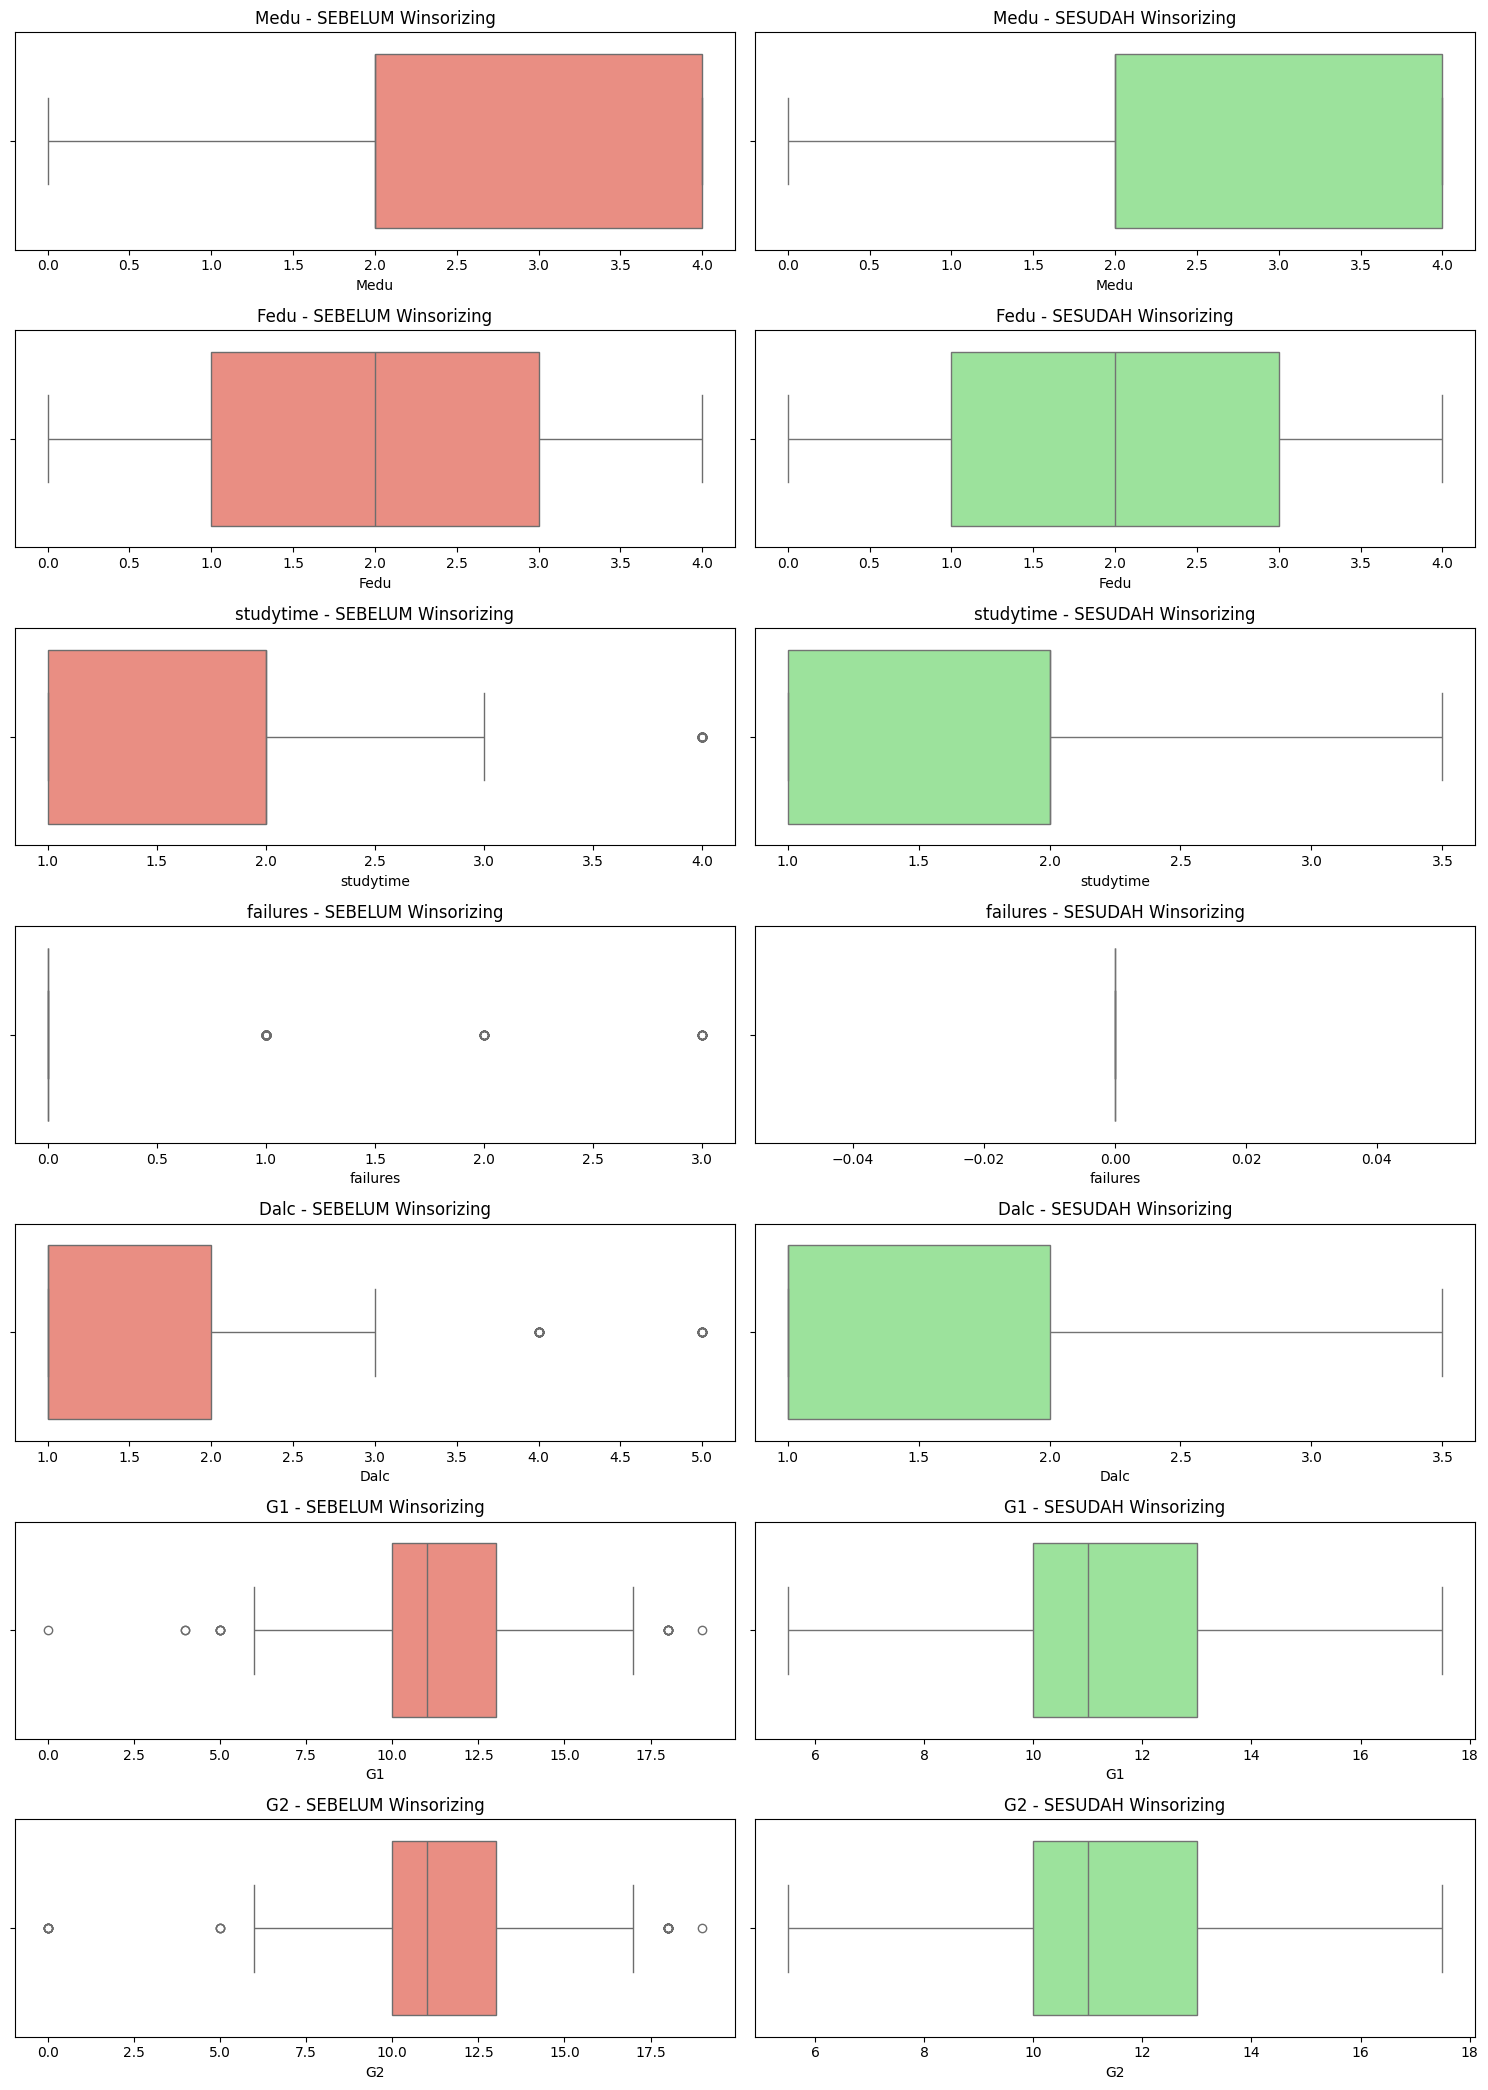

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom yang ingin dibandingkan
selected_cols = df_winsorized.columns.drop('G3')  # kecuali target

# Buat subplot
plt.figure(figsize=(15, len(selected_cols) * 3))

for i, col in enumerate(selected_cols):
    plt.subplot(len(selected_cols), 2, 2*i + 1)
    sns.boxplot(x=df_selected[col], color='salmon')
    plt.title(f"{col} - SEBELUM Winsorizing")

    plt.subplot(len(selected_cols), 2, 2*i + 2)
    sns.boxplot(x=df_winsorized[col], color='lightgreen')
    plt.title(f"{col} - SESUDAH Winsorizing")

plt.tight_layout()
plt.show()


In [17]:
print(df_winsorized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Medu       649 non-null    int64  
 1   Fedu       649 non-null    int64  
 2   studytime  649 non-null    float64
 3   failures   649 non-null    int64  
 4   Dalc       649 non-null    float64
 5   G1         649 non-null    float64
 6   G2         649 non-null    float64
 7   G3         649 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 40.7 KB
None


#### *Standarisasi Data*

Berikut ini saya akan melakukan standarisasi data yang sudah kita pilih

In [18]:
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_winsorized.drop(columns='G3')
y = df_winsorized['G3']

# Standarisasi fitur
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

# Konversi kembali ke DataFrame agar mudah dibaca
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)


In [19]:
print(X_standardized_df)

         Medu      Fedu  studytime  failures      Dalc        G1        G2
0    1.310216  1.540715   0.125568       0.0 -0.592589 -2.206630 -0.230013
1   -1.336039 -1.188832   0.125568       0.0 -0.592589 -0.899455 -0.230013
2   -1.336039 -1.188832   0.125568       0.0  0.724501  0.220979  0.513590
3    1.310216 -0.278983   1.429466       0.0 -0.592589  0.967936  0.885391
4    0.428131  0.630866   0.125568       0.0 -0.592589 -0.152499  0.513590
..        ...       ...        ...       ...       ...       ...       ...
644 -0.453954  0.630866   1.429466       0.0 -0.592589 -0.525977 -0.230013
645  0.428131 -1.188832   0.125568       0.0 -0.592589  1.341414  1.257192
646 -1.336039 -1.188832   0.125568       0.0 -0.592589 -0.152499  0.141789
647  0.428131 -1.188832  -1.178330       0.0  2.041591 -0.525977 -0.601814
648  0.428131 -0.278983  -1.178330       0.0  2.041591 -0.525977 -0.230013

[649 rows x 7 columns]


#### *Split Data Training and Test*

In [20]:
from sklearn.model_selection import train_test_split

# Misalnya kita gunakan data hasil standarisasi:
# X_standardized_df dan y

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized_df,  # atau X_normalized_df jika pakai normalisasi
    y,                  # target (G3)
    test_size=0.2,      # 20% untuk testing
    random_state=42     # agar hasil konsisten
)

# Cek dimensi hasil
print("Ukuran Data:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Ukuran Data:
X_train: (519, 7)
X_test: (130, 7)
y_train: (519,)
y_test: (130,)


## **Modeling**

#### *Linier Regression*

Regresi linier adalah salah satu algoritma machine learning paling dasar dan banyak digunakan untuk memodelkan hubungan antara dua variabel atau lebih, di mana salah satu variabel (dependen) dianggap sebagai fungsi linier dari variabel lainnya (independen). Secara sederhana, regresi linier mencari garis lurus terbaik (best-fit line) yang menggambarkan pola hubungan antar data.

Tujuan Utama
Tujuan utama dari regresi linier adalah untuk:

1. Memprediksi: Memprediksi nilai variabel dependen (target) berdasarkan nilai variabel independen (fitur).
2. Memahami Hubungan: Mengidentifikasi kekuatan dan arah hubungan antara variabel-variabel tersebut.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model
model_lr = LinearRegression()

# Latih model dengan data training
model_lr.fit(X_train, y_train)

# Prediksi pada data test
y_pred_lr = model_lr.predict(X_test)
model_name = "Linear Regression"


### *Decision Tree Regresi*

Decision Tree (Pohon Keputusan) adalah salah satu algoritma machine learning yang kuat dan intuitif, digunakan baik untuk tugas klasifikasi maupun regresi. Seperti namanya, Decision Tree bekerja dengan membangun model dalam bentuk struktur pohon, di mana setiap node internal merepresentasikan "pertanyaan" atau "pengujian" fitur, setiap cabang merepresentasikan hasil dari pengujian tersebut, dan setiap node daun (leaf node) merepresentasikan "keputusan" akhir atau nilai prediksi.

Bayangkan Anda sedang mencoba memutuskan apakah akan membawa payung atau tidak. Anda mungkin akan bertanya: "Apakah hari ini hujan?" Jika ya, Anda mungkin bertanya lagi: "Apakah hujannya deras?" Jika tidak, Anda mungkin bertanya: "Apakah ada awan mendung?" Pohon keputusan bekerja dengan cara yang sangat mirip, secara sistematis memecah data berdasarkan pertanyaan-pertanyaan ini hingga mencapai keputusan.

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
model_name = "Decision Tree"


#### *K-Neighbors Regressor*

K-Neighbors Regressor (KNR), sering juga disebut KNN Regressor, adalah salah satu algoritma machine learning yang digunakan untuk tugas regresi. Algoritma ini termasuk dalam kategori algoritma non-parametrik dan lazy learner (pembelajar malas).

Non-parametrik: Ini berarti KNR tidak membuat asumsi tentang bentuk fungsi yang mendasari data atau distribusi data.
Lazy Learner: KNR tidak secara eksplisit membangun model selama fase pelatihan. Sebaliknya, ia hanya menghafal dataset pelatihan. Semua "pembelajaran" atau komputasi terjadi pada saat prediksi.
Ide utama di balik K-Neighbors Regressor adalah: "Jika Anda ingin memprediksi nilai suatu titik data baru, cari 'tetangga' terdekatnya dalam data yang sudah ada, lalu ambil rata-rata dari nilai-nilai tetangga tersebut sebagai prediksi."

Bayangkan Anda ingin menebak harga sebuah rumah baru di kompleks Anda. Alih-alih membuat rumus matematis yang rumit, Anda mungkin akan bertanya kepada tetangga di sekitar rumah tersebut, mencari rumah-rumah yang paling mirip (ukuran, jumlah kamar, dll.), dan kemudian mengambil rata-rata harga dari rumah-rumah tetangga tersebut sebagai perkiraan. Itulah esensi dari KNR.

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
model_name = "K-Neighbors Regressor"


## **Evaluasi**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"=== Evaluasi untuk: {model_name} ===")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print()

#### *Evaluasi Linier Regression*

In [25]:
# Evaluasi Model Linear Regression
evaluate_model(y_test, y_pred_lr, model_name="Linear Regression")

=== Evaluasi untuk: Linear Regression ===
MAE  : 0.7931
MSE  : 1.5954
RMSE : 1.2631
R²   : 0.8364



#### *Evaluasi Decision Tree*

In [26]:
evaluate_model(y_test, y_pred_tree, model_name="Decision Tree")

=== Evaluasi untuk: Decision Tree ===
MAE  : 0.9838
MSE  : 2.9941
RMSE : 1.7303
R²   : 0.6930



In [27]:
evaluate_model(y_test, y_pred_knn, model_name="K-Neighbors Regressor")

=== Evaluasi untuk: K-Neighbors Regressor ===
MAE  : 0.9954
MSE  : 2.3025
RMSE : 1.5174
R²   : 0.7639




1. 🧠 Penjelasan Metrik

* **MAE (Mean Absolute Error)**: Rata-rata kesalahan absolut. Semakin kecil, semakin baik.
* **MSE (Mean Squared Error)**: Rata-rata kuadrat kesalahan. Memberi penalti lebih besar untuk error besar.
* **RMSE**: Akar dari MSE. Sama satuan dengan target (`G3`).
* **R² (R-squared)**: Seberapa baik model menjelaskan variansi target. Nilai mendekati 1 berarti sangat baik.

---

2. ✅ **Analisis Performa**

   1. **Linear Regression**

    * MAE dan RMSE **paling kecil**
    * R² **paling tinggi**: `0.8364`
    * Artinya model ini **menangkap pola linier antar fitur dan target (G3) dengan sangat baik**
    * **Model baseline terbaik sejauh ini**

   2. **Decision Tree**
   
    * Lebih fleksibel karena bisa menangani non-linearitas
    * Tapi overfitting bisa terjadi jika tidak di-pruning
    * R² `0.6930` → jauh di bawah Linear Regression
    * Error juga **lebih tinggi**


   3. **KNN Regressor**

    * Kinerja lebih baik dari Decision Tree, tapi **masih di bawah Linear Regression**
    * Bisa saja performanya membaik jika kamu:

      * **Tuning nilai `n_neighbors`**
      * Scaling datanya sudah bagus (karena KNN sangat sensitif terhadap skala)

---

## 💡 Kesimpulan Sementara:

* **Linear Regression** adalah **model terbaik** sejauh ini



## **Deploy Model**

Unduh model yang akan digunakan dalam deploy. berikut ini adalah contohnya

In [28]:
import joblib

# Simpan model
joblib.dump(model_lr, 'model_linear.pkl')

# Simpan juga scaler (jika ada)
joblib.dump(scaler_std, 'scaler.pkl')


['scaler.pkl']

setelah itu kalian perlu membuat akun di steamlit. untuk cara pembuatannya mungkin bisa dibaca pada dokumentasi berikut ini: [Steamlit Deploy](https://docs.streamlit.io/deploy/streamlit-community-cloud). Selanjutnya kalian bisa membuat repo baru di github lalu masukkan file file yang diperlukan. Untuk struktur file yang saya gunakan sendiri adalah sebagai berikut ini [My Github](https://github.com/fznnfitrah/deploy-UAS-pendata). Berikut adalah hasil website yang sudah saya unggah dengan menggunakan Steamlit [Prediksi Nilai Akhir Siswa](https://deploy-uas-pendata-rvzqwdrflbn7wuzfmahhlj.streamlit.app/). Berikut ini adalah hasil web yang sudah saya deploy

Link : https://deploy-uas-pendata-rvzqwdrflbn7wuzfmahhlj.streamlit.app/

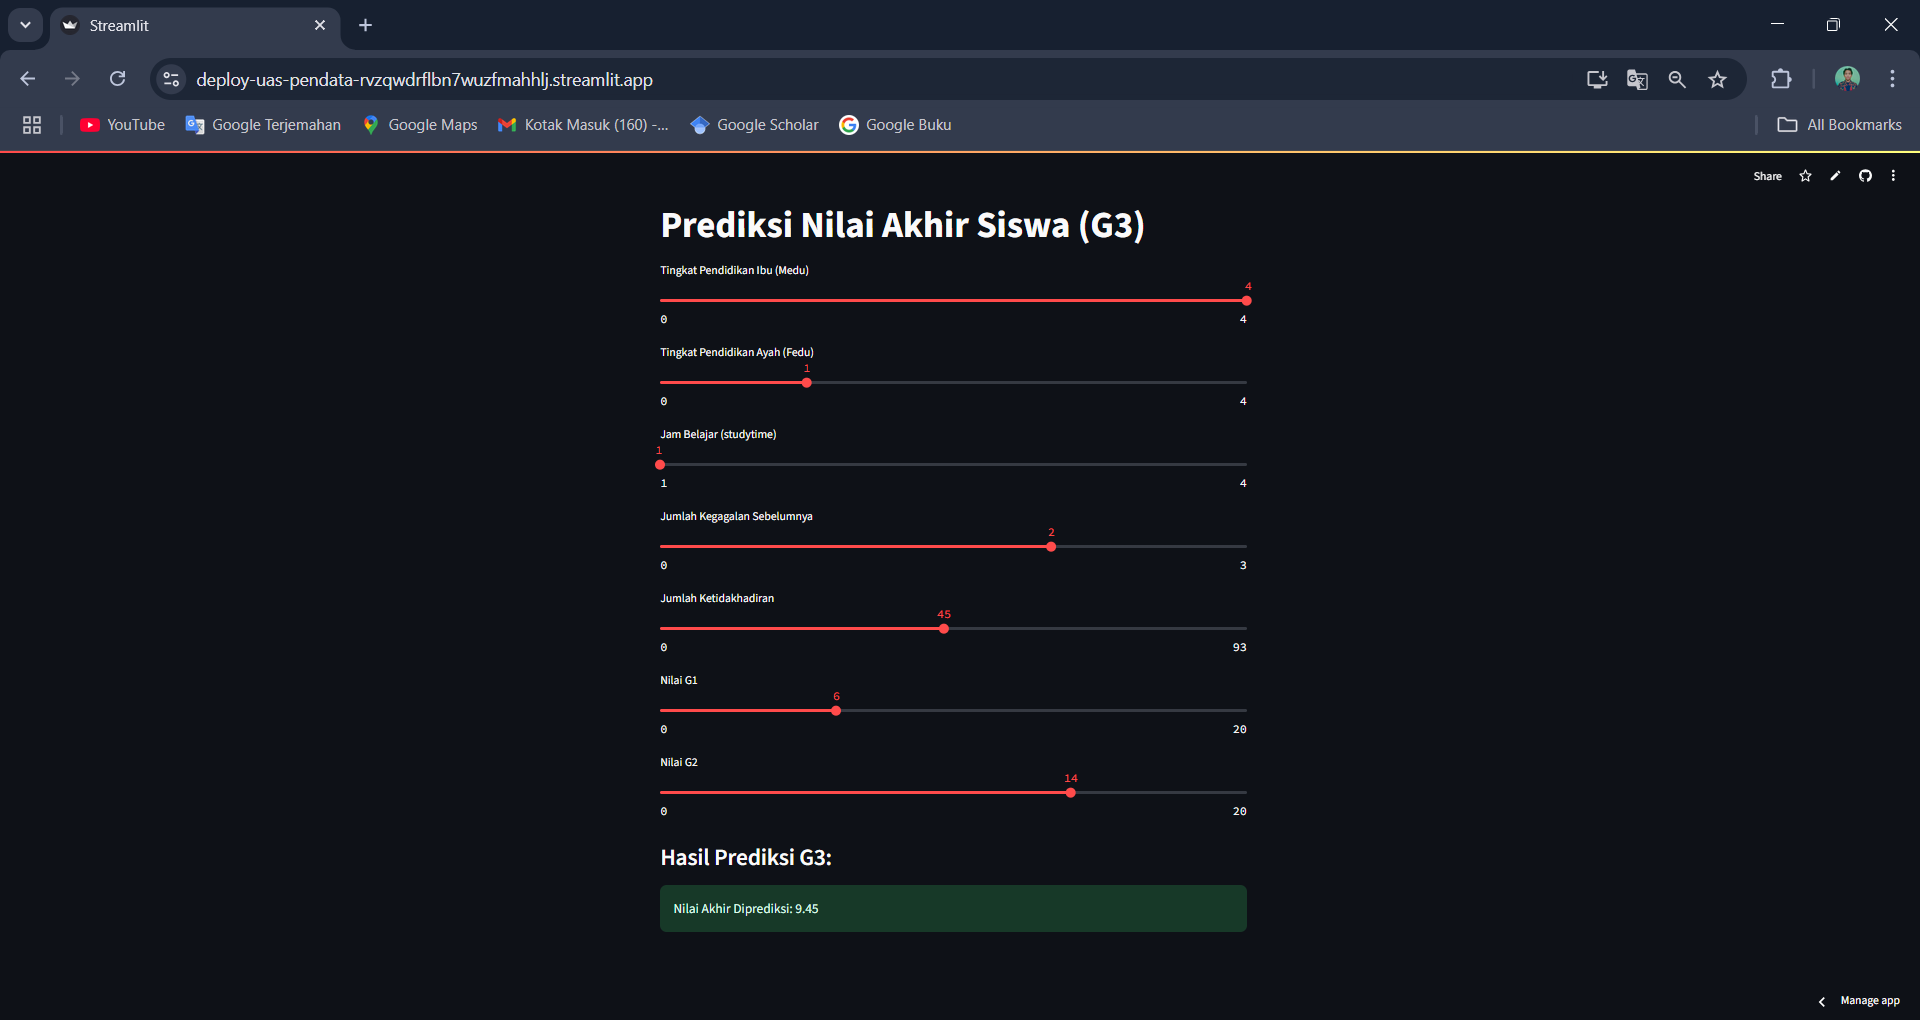